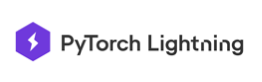

# The Boring Model
Replicate a bug you experience, using this model.

[Remember! we're always available for support on Slack](https://join.slack.com/t/pytorch-lightning/shared_invite/zt-f6bl2l0l-JYMK3tbAgAmGRrlNr00f1A)

---
## Setup env

In [ ]:
%%capture
! pip install -qU pytorch-lightning

---
## Deps

In [ ]:
import os

import torch
from torch.utils.data import DataLoader, Dataset

from pytorch_lightning import LightningModule, Trainer

---
## Data
Random data is best for debugging. If you needs special tensor shapes or batch compositions or dataloaders, modify as needed

In [ ]:
class RandomDataset(Dataset):
    def __init__(self, size, num_samples):
        self.len = num_samples
        self.data = torch.randn(num_samples, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

In [ ]:
num_samples = 10000

In [ ]:
class BoringModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(32, 2)

    def forward(self, x):
        return self.layer(x)

    def training_step(self, batch, batch_idx):
        loss = self(batch).sum()
        self.log("train_loss", loss)
        return {"loss": loss}

    def validation_step(self, batch, batch_idx):
        loss = self(batch).sum()
        self.log("valid_loss", loss)

    def test_step(self, batch, batch_idx):
        loss = self(batch).sum()
        self.log("test_loss", loss)

    def configure_optimizers(self):
        return torch.optim.SGD(self.layer.parameters(), lr=0.1)

---
## Define the test

In [ ]:
def run():
    train_data = DataLoader(RandomDataset(32, 64), batch_size=2)
    val_data = DataLoader(RandomDataset(32, 64), batch_size=2)
    test_data = DataLoader(RandomDataset(32, 64), batch_size=2)

    model = BoringModel()
    trainer = Trainer(
        default_root_dir=os.getcwd(),
        limit_train_batches=1,
        limit_val_batches=1,
        limit_test_batches=1,
        num_sanity_val_steps=0,
        max_epochs=1,
        enable_model_summary=False,
    )
    trainer.fit(model, train_dataloaders=train_data, val_dataloaders=val_data)
    trainer.test(model, dataloaders=test_data)

---
## Run Test

In [ ]:
run()

---
## Environment
Run this to get the environment details

In [ ]:
%%capture
! wget https://raw.githubusercontent.com/PyTorchLightning/pytorch-lightning/master/requirements/collect_env_details.py

In [ ]:
! python collect_env_details.py